# A/B Testing to Inform Business Decisions

# Introduction

As an analyst at a big online store. Together with the marketing department, I have compiled a list of hypotheses that may help boost revenue. I need to prioritize these hypotheses, launch an A/B test, and analyze the results.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part-1.-Data-Preprocessing" data-toc-modified-id="Part-1.-Data-Preprocessing-1">Part 1. Data Preprocessing</a></span></li><li><span><a href="#Part-2.-Prioritizing-Hypotheses" data-toc-modified-id="Part-2.-Prioritizing-Hypotheses-2">Part 2. Prioritizing Hypotheses</a></span></li><li><span><a href="#Part-3.-A/B-Test-Analysis" data-toc-modified-id="Part-3.-A/B-Test-Analysis-3">Part 3. A/B Test Analysis</a></span></li><li><span><a href="#Conclusion:-Making-a-decision-based-on-the-test-results" data-toc-modified-id="Conclusion:-Making-a-decision-based-on-the-test-results-4">Conclusion: Making a decision based on the test results</a></span></li></ul></div>

## Part 1. Data Preprocessing

Importing data and Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
%matplotlib inline
pd.set_option('max_colwidth', 400)

visits= pd.read_csv("visits_us.csv", sep = ",")

orders= pd.read_csv("orders_us.csv", sep = ",")

hypotheses= pd.read_csv("hypotheses_us.csv", sep = ";")

Viewing general information and description of data.

In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [10]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 8.4 KB


In [12]:
visits.describe().T

,count,mean,std,min,25%,50%,75%,max
visits,62.0,607.290323,114.40056,361.0,534.0,624.5,710.5,770.0


The general information shows the `date` column is object instead of datetime. The other columns are in the right format. However, the size of the visits data type can be optimized. The average number of visits on the date specified in the A/B test group specified was about 607 and a median of about 625.

In [13]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [14]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 179.0 KB


In [15]:
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
transactionId,1197.0,2.155621e+09,1.229085e+09,1062393.0,1.166776e+09,2.145194e+09,3.237740e+09,4.293856e+09
visitorId,1197.0,2.165960e+09,1.236014e+09,5114589.0,1.111826e+09,2.217985e+09,3.177606e+09,4.283872e+09
revenue,1197.0,1.314916e+02,6.030047e+02,5.0,2.080000e+01,5.020000e+01,1.304000e+02,1.992040e+04


The general information shows the `date` column in the orders table is object instead of datetime. The other columns are in the right format. However, the size of the revenue data type can be optimized. The average revenue from the order was about 131 dollars and a median of about 50 dollars. 

In [16]:
hypotheses.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1


In [9]:
hypotheses.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 1.6 KB


In [10]:
hypotheses.describe().T

,count,mean,std,min,25%,50%,75%,max
Reach,9.0,4.777778,3.153481,1.0,3.0,3.0,8.0,10.0
Impact,9.0,4.777778,3.192874,1.0,3.0,3.0,7.0,10.0
Confidence,9.0,5.555556,3.045944,1.0,3.0,7.0,8.0,9.0
Effort,9.0,4.888889,2.803767,1.0,3.0,5.0,6.0,10.0


The general information shows all the columns in the hypotheses table are in the right format. However, the size of the Reach, impact, confidence, and effort data types can be optimized. The the maximum value for reach, impact, and effort are 10 while that of confidence is 9. All numerical columns have a minimum of 1. All columns have an avarage of about 5.

Optimizing the data size

In [11]:
visits= pd.read_csv("visits_us.csv",sep=',', dtype={'visits':'int16' })

orders= pd.read_csv("orders_us.csv", sep=',', dtype={'revenue':'float32'})

hypotheses= pd.read_csv("hypotheses_us.csv", sep = ";", dtype={'Reach':'int16', 'Impact':'int16', 'Confidence':'int16', 'Effort':'int16'})

Converting column names to lowercase letters.

In [12]:
orders.columns = orders.columns.str.lower()
orders.columns 

Index(['transactionid', 'visitorid', 'date', 'revenue', 'group'], dtype='object')

In [13]:
hypotheses.columns = hypotheses.columns.str.lower()
hypotheses.columns 

Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object')

Coverting date columns to datetime

In [14]:
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Reviewing general information of data

In [15]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int16         
dtypes: datetime64[ns](1), int16(1), object(1)
memory usage: 4.5 KB


In [16]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float32       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float32(1), int64(2), object(1)
memory usage: 105.3 KB


In [17]:
hypotheses.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int16 
 2   impact      9 non-null      int16 
 3   confidence  9 non-null      int16 
 4   effort      9 non-null      int16 
dtypes: int16(4), object(1)
memory usage: 1.4 KB


All columns are in their required data types.

Checking for duplicates

In [18]:
visits.duplicated().sum()

0

In [19]:
orders.duplicated().sum()

0

In [20]:
hypotheses.duplicated().sum()

0

There are no duplicates in the data.

Checking to see if some of the visitors might have gotten into both group A and group B.

In [21]:
visitors_in_2groups = orders[orders.groupby("visitorid")['group'].transform('nunique') > 1]
visitors_in_2groups.shape[0]

181

A total of 181 visitors belong to both group A and B. Which is not good for an A/B test as participants must be in independent groups or not more than one group. 

Filtering out the visitors that belong to both groups

In [22]:
orders_new= orders[~orders["visitorid"].isin(visitors_in_2groups["visitorid"])]
print("Size before:", orders.shape[0])
print("Size now:", orders_new.shape[0])

Size before: 1197
Size now: 1016


In [23]:
orders_new.group.value_counts()

B    548
A    468
Name: group, dtype: int64

**Interim Conclusion**

The date types have been coverted to the required data types, duplicates have been checked, I have ensured no visitor belongs to two groups, and the data size have been optimized.

## Part 2. Prioritizing Hypotheses

**Applying the ICE framework to prioritize hypotheses**

ICE score = (impact * confidence)/ effort

In [24]:
hypotheses["ice"] = (hypotheses["impact"]*hypotheses["confidence"])/ hypotheses["effort"]
hypotheses.sort_values(by="ice", ascending=False)

,hypothesis,reach,impact,confidence,effort,ice
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000


In [25]:
hypotheses.loc[8,'hypothesis']

'Launch a promotion that gives users discounts on their birthdays'

Hypotheses 8, 0, and 7 have the highest ICE score ( all three have at least a score of 11), the least score is hypothesis 4.

**Applying the RICE framework to prioritize hypotheses**

RICE score = (reach * impact * confidence*)/ effort

In [26]:
hypotheses["rice"] = (hypotheses["reach"] *hypotheses["impact"]*hypotheses["confidence"])/ hypotheses["effort"]
hypotheses.sort_values(by="rice", ascending=False)

,hypothesis,reach,impact,confidence,effort,ice,rice
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0


In [27]:
hypotheses.loc[7, "hypothesis"]

'Add a subscription form to all the main pages. This will help you compile a mailing list'

Hypotheses 7,2, 0, and 6 have the highest RICE score (all four have at least a score of 40), the least score is hypothesis 4.
The prioritization of hypotheses changes when we use RICE instead of ICE, i.e. In ICE, hypothesis 8 was the highest but it is only 5th with the RICE scores. Hypothesis 7 was 3rd in ICE but on top and twice as much score as the 2nd hypothesis(2). The differences are due to the `Reach`values of the hypotheses. The hypotheses with higher reach, impact, and confidence, and comparatively lower effort have comparatively higher RICE score, for instance, hypothsis 7.

Visualizing ICE and RICE

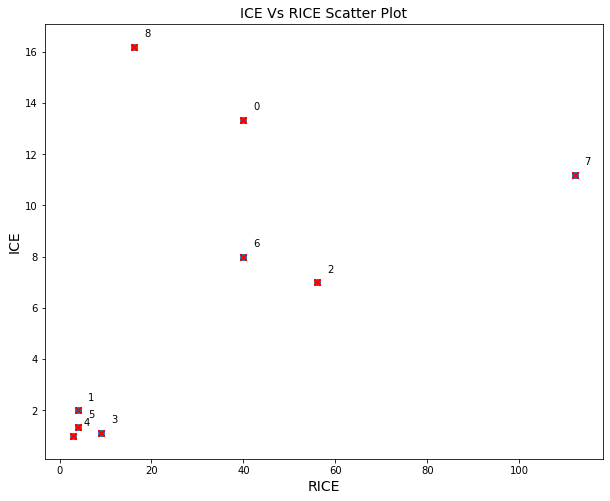

In [28]:
x = hypotheses['rice'].values
y = hypotheses['ice'].values
types = hypotheses.index.values

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x, y)

ax.set_xlabel('RICE', fontsize=14)
ax.set_ylabel('ICE', fontsize=14)
ax.set_title('ICE Vs RICE Scatter Plot', fontsize=14)

for i, txt in enumerate(types):
    ax.annotate(txt, (x[i], y[i]), xytext=(10,10), textcoords='offset points')
    plt.scatter(x, y, marker='x', color='red')

From the graph, it can be seen that, hypothesis 7 scores higher in both ICE and RICE, hypothesis 8 only scores higher in ICE.
Hypothesis 1,3,4, and 5 scores low in both ICE and RICE.

**Interim Conclusion**

The hypotheses have been prioritized. Some hypotheses that ranked high in ICE, for instance, hypotheses 8 ranked comparatively low in the RICE score due to difference in `Reach`values. Hypothesis 0 and 7 ranked among the top three in both ICE and RICE scores.

## Part 3. A/B Test Analysis

**1. Graphing cumulative revenue by group**

I would build an array with unique paired date-group values and get aggregated cumulative daily data on orders and aggregated cumulative daily data on visitors.  

In [29]:
datesGroups = orders_new[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders_new[np.logical_and(orders_new['date'] <= x['date'], orders_new['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.599854,719
1,2019-08-01,B,17,17,967.199951,713
2,2019-08-02,A,42,36,3734.899902,1338
3,2019-08-02,B,40,39,3535.300293,1294
4,2019-08-03,A,66,60,5550.100098,1845


Ploting cumulative revenue graphs by day and A/B test group:
I will first create dataFrame with cumulative orders and cumulative revenue by day,for group A and B before ploting the graph.

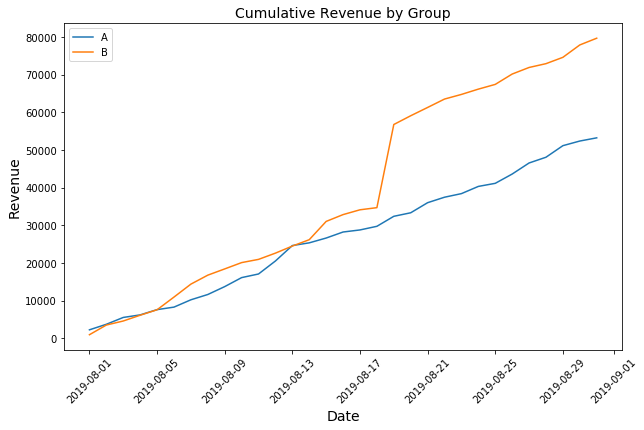

In [30]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

fig, ax = plt.subplots()
fig.set_size_inches(10,6)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

ax.set_title("Cumulative Revenue by Group", fontdict={"size":14})
plt.xlabel("Date", fontdict={"size":14})
plt.ylabel("Revenue", fontdict={"size":14})
plt.xticks(rotation=45)
plt.legend()
plt.show()

Revenue is increasing throughout the whole test which is a good sign. However, it can be observed that both groups see spikes in revenue at certain points; especially group B. Group B is leading in revenue in most part of the test and the gap increases after August 17, 2019. The spikes may imply either a surge in the number of orders or the presence of very expensive orders in the sample; a hint of outliers in the data.

**2. Graphing cumulative average order size by group**

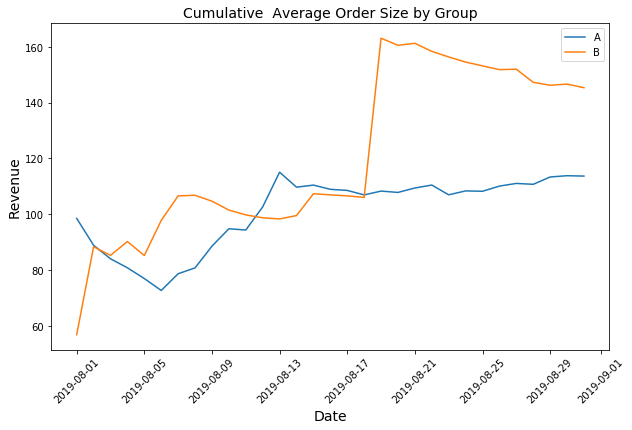

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

ax.set_title("Cumulative  Average Order Size by Group", fontdict={"size":14})
plt.xlabel("Date", fontdict={"size":14})
plt.ylabel("Revenue", fontdict={"size":14})
plt.xticks(rotation=45)
plt.legend()
plt.show()

The average order size fluctuates a lot for both groups although it becomes a bit steady by the end of the test. Average order size of Group B is still higher than group A but it is falling for group B, group A is far bellow group B but more steady. The surge in group B in the middle of the test may have been due to the presence of large, expensive orders.  

**3. Graphing the relative difference in cumulative average order size for group B compared with group A**

I will merge the data into one DataFrame and plot the relative difference graph for the average purchase sizes

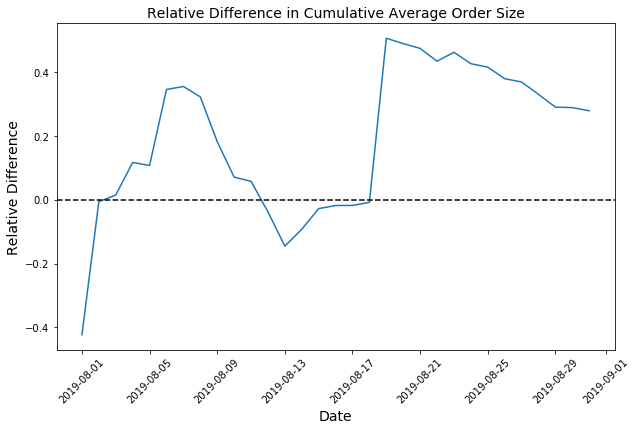

In [32]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

fig, ax = plt.subplots()
fig.set_size_inches(10,6)
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

ax.set_title("Relative Difference in Cumulative Average Order Size", fontdict={"size":14})
plt.xlabel("Date", fontdict={"size":14})
plt.ylabel("Relative Difference", fontdict={"size":14})
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.show()

There were several sudden and considerable changes, i.e. the difference between the segments spikes from below -0.4 to above 04. This means there must be some big orders and outliers or abnormally large purchases.

**4. Calculating each group's conversion rate as the ratio of orders to the number of visits for each day, and Ploting the daily conversion rates of the two groups** 

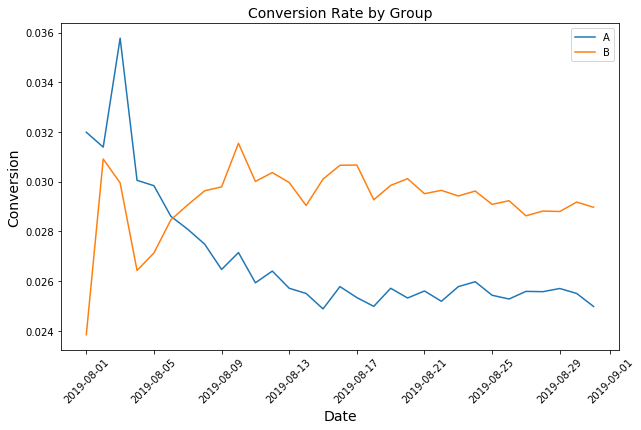

In [33]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

fig, ax = plt.subplots()
fig.set_size_inches(10,6)
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

ax.set_title("Conversion Rate by Group", fontdict={"size":14})
plt.xlabel("Date", fontdict={"size":14})
plt.ylabel("Conversion", fontdict={"size":14})
plt.legend()
plt.xticks(rotation=45)
plt.show()

At the begining of the test, the conversion rate of group A was higher. After few days, group B took over and lead till the end of the test. There were much fluctuations in the conversion rate but after August 17, 2019, conversion rates for both groups are fluctuating less than before.

**5. Ploting a scatter chart of the number of orders per user**

I will create `ordersByUsers` dataframe by grouping by `visitorid` and count the number of unique order ids before ploting. 

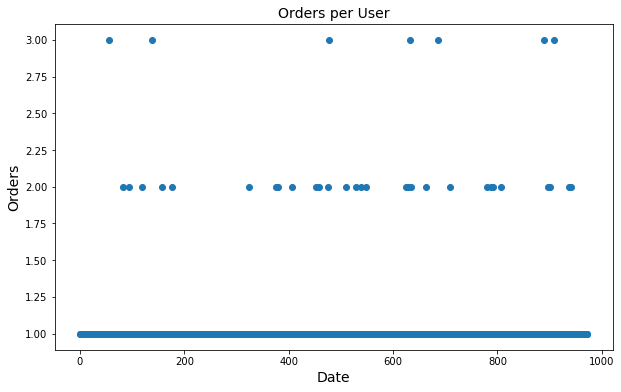

In [34]:
ordersByUsers = (orders_new.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorid', as_index=False)
    .agg({'transactionid': "nunique"}))

ordersByUsers.columns = ['userId', 'orders']

fig, ax = plt.subplots()
fig.set_size_inches(10,6)
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
ax.set_title("Orders per User", fontdict={"size":14})
plt.xlabel("Date", fontdict={"size":14})
plt.ylabel("Orders", fontdict={"size":14})
plt.show()

There are some orders there were above 1, i.e. 2 and 3. As generally, the most extreme 1-5% of observed values are filtered out. Based on the graph, we can set the limit for abnormal orders between 2 and 3. Even though, orders of 2 and 3 are not too extreme comparatively.  

**6. Calculating the 95th and 99th percentiles for the number of orders per user**

In [35]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Not more than 5% of users ordered more than 1, and not more than 1% ordered more than 2.  Hence filtering out 5% of observed values (deemed abnormal) means orders greater than 1.

**7. Ploting a scatter chart of order prices**

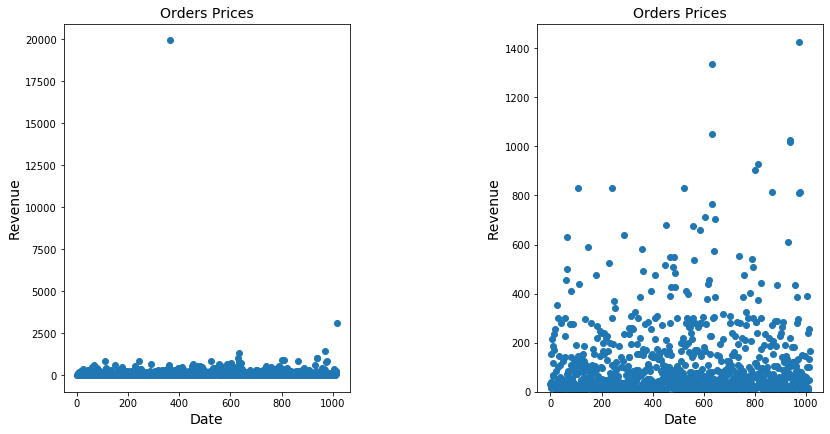

In [36]:
fig, ax = plt.subplots(nrows=4, ncols=4)
fig.tight_layout()
fig.set_size_inches(12,6)

plt.subplot(1,2,1)
x_values = pd.Series(range(0,len(orders_new['revenue'])))
plt.scatter(x_values, orders_new['revenue'])
plt.title("Orders Prices", fontdict={"size":14})
plt.xlabel("Date", fontdict={"size":14})
plt.ylabel("Revenue", fontdict={"size":14})


plt.subplot(1,2,2)
x_values = pd.Series(range(0,len(orders_new['revenue'])))
plt.scatter(x_values, orders_new['revenue'])
plt.ylim(top=1500,bottom=0)
plt.title("Orders Prices", fontdict={"size":14})
plt.xlabel("Date", fontdict={"size":14})
plt.ylabel("Revenue", fontdict={"size":14})
plt.show()

From the first subplot, there are few big orders. Hence basing on the first graph, we can set the limit for abnormal orders between 2,500.00 dollars and 20,000.00 dollars (as there are only two extreme data points). However, after truncating outliers by limiting y values to maximum, 1500 dollars, it is clear there are several outliers above 400 dollars.

**8. Calculating the 95th and 99th percentiles of order prices**

In [37]:
print(np.percentile(orders_new['revenue'], [95, 99]))

[414.27500153 830.29998779]


Not more than 5% of orders cost more than 414.27 dollars, and not more than 1% cost more than 830.30 dollars. Hence filtering out 5% of observed values means values greater than 414.27 dollars.

**9. Finding the statistical significance of the difference in conversion between the groups using the raw data**

I will creat two sample pairs for both groups and test if there are significant differences. As the data contains outliers, algebraic metrics do not work very well. Hence, I would use the Mann-Whitney U test, i.e. conduct a Nonparametric Tests. 

**Hypotheses:**

H0: There is no statistically significant difference in conversion between the groups

H1: There is statistically significant difference in conversion between the groups

Significance level (alpha) = 0.05

In [38]:
ordersByUsersA = orders_new[orders_new['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : "nunique"})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders_new[orders_new['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : "nunique"})
ordersByUsersB.columns = ['userId', 'orders']


sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("P_value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))

print("Relative Conversion rate: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

P_value: 0.011
Relative Conversion rate: 0.160


Based on the raw data, there is significant difference between groups A and B. Hence, there is enough evidence to reject H0. Therefore, group B's relative gain of about %16 is significant.

**10. Finding the statistical significance of the difference in average order size between the groups using the raw data**

**Hypotheses:**

H0: There is no statistically significant difference in average order size between the groups 

H1: There is statistically significant difference in average order size between the groups 

Alpha = 0.05

In [39]:
print('p_value: {0:.3f}'.format(stats.mannwhitneyu(orders_new[orders_new['group']=='A']['revenue'], orders_new[orders_new['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print('Relative Conversion: {0:.3f}'.format(orders_new[orders_new['group']=='B']['revenue'].mean()/orders_new[orders_new['group']=='A']['revenue'].mean()-1))

p_value: 0.862
Relative Conversion: 0.278


Based on the raw data, there isn't a significant difference between groups A and B. A  p_value of 0.862 is greater than 0.05. So we can't reject the null hypothesis that there's not a statistically significant difference in average order size between the groups. However, there is relative a gain for group B (about 28%).

**11. Finding the statistical significance of the difference in conversion between the groups using the filtered data**

**Hypotheses:**

H0: There is no statistically significant difference in conversion between the groups

H1: There is statistically significant difference in conversion between the groups

Alpha = 0.05

In [40]:
orders_new.rename(columns= ({"visitorid": "userId"}), inplace=True)
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'], 
                                 ordersByUsersB[ordersByUsersB['orders']> 1]['userId']], axis = 0)
usersWithExpensiveOrders = orders_new[orders_new['revenue'] > 414]['userId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - 
                                                          len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - 
                                                          len(ordersByUsersB['orders'])),name='orders')],axis=0)
print("P_value: {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print("Relative Conversion rate: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P_value: 0.016
Relative Conversion rate: 0.174


Based on the filtered data, there is significant difference between groups A and B. Hence, there is enough evidence to reject the null hypothesis that there no statistically significant difference in conversion between the groups. Therefore, group B's relative gain of about %17 is significant. After filtering the data, the changes in the relative gain for group B was only about 0.014%.

**12. Finding the statistical significance of the difference in average order size between the groups using the filtered data**

**Hypotheses:**

H0: There is no statistically significant difference in average order size between the groups 

H1: There is statistically significant difference in average order size between the groups 

Alpha = 0.05

In [41]:
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders_new[np.logical_and(
        orders_new['group']=='A',
        np.logical_not(orders_new['userId'].isin(abnormalUsers)))]['revenue'],
    orders_new[np.logical_and(
        orders_new['group']=='B',
        np.logical_not(orders_new['userId'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]))

print('{0:.3f}'.format(
    orders_new[np.logical_and(orders_new['group']=='B',np.logical_not(orders_new['userId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders_new[np.logical_and(
        orders_new['group']=='A',
        np.logical_not(orders_new['userId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 


0.771
-0.033


Based on the filtered data, there is not a significant difference between groups A and B. A p_value of 0.771 is greater than 0.05. So we can't reject the null hypothesis that there's not a statistically significant difference in average order size between the groups. Also, there is a relative loss for group B (about 3.3%).

## Conclusion: Making a decision based on the test results

- Decison: stop the test, consider group B as the leader.
- Although there is no signficant difference between the groups considering their average order size, there is statistically and signicant difference in conversion between the groups, and group B's relative conversion gain is significant.
- The test is therefore, successful. 